In [1]:
import yfinance as yf


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [3]:
sp500 = yf.Ticker("^GSPC")

In [4]:
msft = yf.Ticker("MSFT")

[*********************100%***********************]  1 of 1 completed


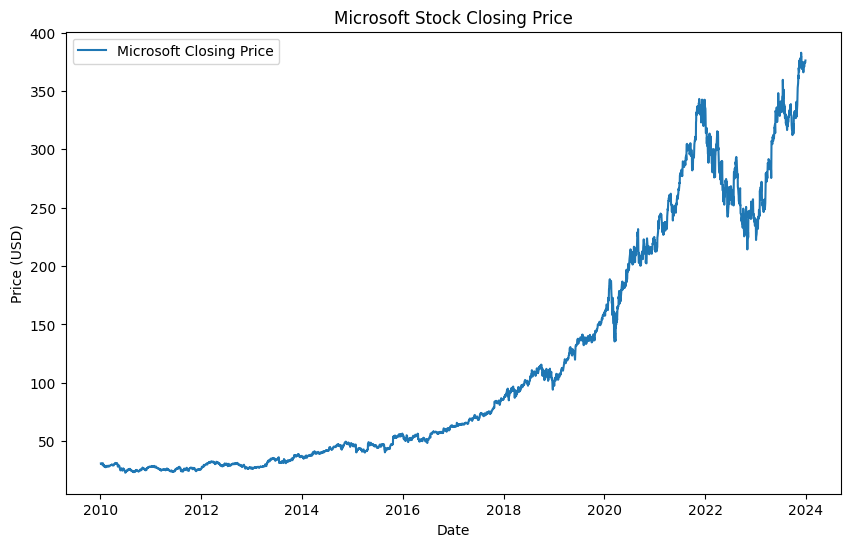

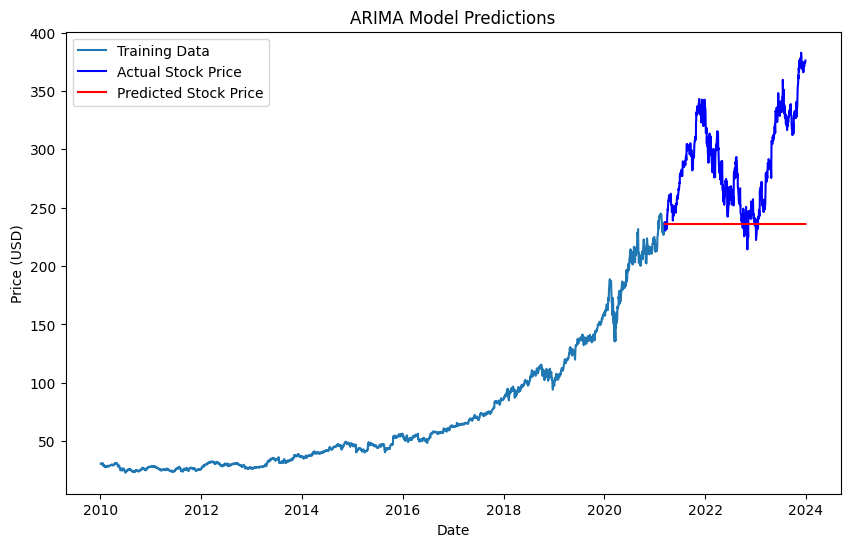

Mean Squared Error: 4415.53


In [5]:
warnings.filterwarnings("ignore")  # To ignore warnings from ARIMA

# Step 1: Download Microsoft stock data
msft = yf.download('MSFT', start='2010-01-01', end='2024-01-01')

# Step 2: Extract the 'Close' prices to use as our time series
msft_close = msft['Close']

# Step 3: Ensure all datetimes are timezone-naive
msft_close.index = msft_close.index.tz_localize(None)

# Step 4: Plot the data to visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(msft_close, label='Microsoft Closing Price')
plt.title('Microsoft Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 5: Train an ARIMA model
# Split data into train and test sets
train_size = int(len(msft_close) * 0.8)
train, test = msft_close[:train_size], msft_close[train_size:]

# Fit the ARIMA model on the training data
order = (5, 1, 0)  # You might need to adjust (p, d, q) after checking model performance
model = ARIMA(train, order=order)
model_fit = model.fit()

# Step 6: Make predictions using integer index positions
start_index = len(train)
end_index = len(train) + len(test) - 1
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Step 7: Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Stock Price', color='blue')
plt.plot(test.index, predictions, label='Predicted Stock Price', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 8: Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse:.2f}')


[*********************100%***********************]  1 of 1 completed


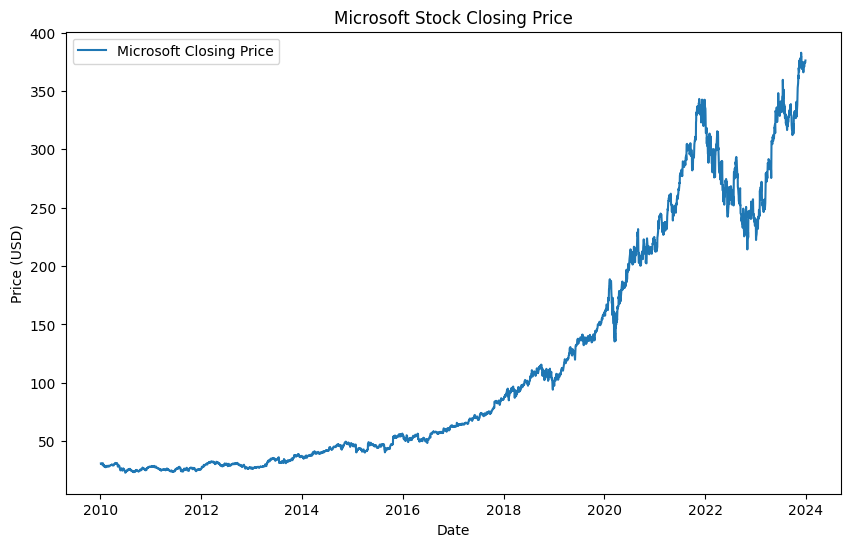

predicted=117.225645, expected=117.940002
predicted=117.718810, expected=119.019997
predicted=118.853950, expected=119.190002
predicted=119.202696, expected=119.970001
predicted=119.861228, expected=119.360001
predicted=119.251011, expected=119.889999
predicted=119.820906, expected=119.930000
predicted=119.818475, expected=119.279999
predicted=119.331251, expected=120.190002
predicted=120.169465, expected=120.330002
predicted=120.177238, expected=120.949997
predicted=120.928011, expected=121.050003
predicted=121.009003, expected=120.769997
predicted=120.741454, expected=121.769997
predicted=121.652872, expected=123.370003
predicted=123.059341, expected=123.760002
predicted=123.634436, expected=125.440002
predicted=125.277521, expected=125.010002
predicted=124.806753, expected=129.149994
predicted=128.681373, expected=129.889999
predicted=129.416590, expected=129.770004
predicted=129.804402, expected=130.600006
predicted=130.450923, expected=127.879997
predicted=127.787087, expected=126

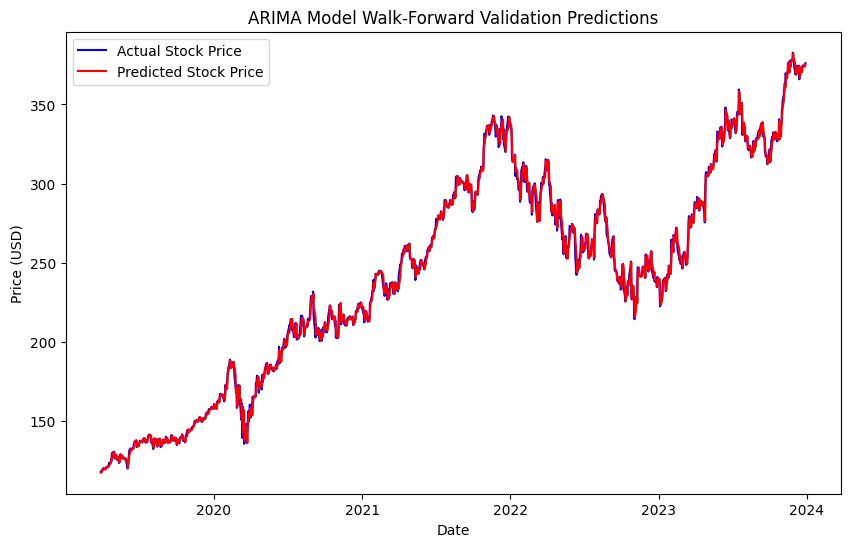

In [6]:
import warnings
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


warnings.filterwarnings("ignore")  # To ignore warnings from ARIMA


# Step 1: Download Microsoft stock data
msft = yf.download('MSFT', start='2010-01-01', end='2024-01-01')


# Step 2: Extract the 'Close' prices to use as our time series
msft_close = msft['Close']


# Step 3: Ensure all datetimes are timezone-naive
msft_close.index = msft_close.index.tz_localize(None)


# Step 4: Plot the data to visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(msft_close, label='Microsoft Closing Price')
plt.title('Microsoft Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# Step 5: Walk-forward validation for ARIMA model
# Split data into train and test sets
X = msft_close.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


# Step 6: Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(msft_close.index[size:], test, label='Actual Stock Price', color='blue')
plt.plot(msft_close.index[size:], predictions, label='Predicted Stock Price', color='red')
plt.title('ARIMA Model Walk-Forward Validation Predictions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()